---

# 1. g2m Case Study Part 2 (Tolga Yaz)


# Goal: 

## Analysis, recommendations and identification of the company that has been performing better and is a better investment opportunity for XYZ.


# _06. Observing the Outliers in dfMain and Dealing with Them if Necessary_

# _07. Seasonal Changes in Profit_

# _08. Age Groups in Profit_

# _09. City Factor in Profit_


---

# _06. Observing the Outliers in dfMain and Dealing with Them if Necessary_

In [5]:
# import main libraries

import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline 
import matplotlib.pyplot as plt

In [6]:
# read dfMain

dfMain = pd.read_csv("dfMain.csv")

In [7]:
# find total and mean profits per year

dfMain = pd.read_csv("dfMain.csv")

profitsYellow2016 = dfMain[(dfMain["Company"] == "Yellow Cab") & (dfMain["YearOfTravelNorm"] == 2016)]["Profit"]

profitsYellow2017 = dfMain[(dfMain["Company"] == "Yellow Cab") & (dfMain["YearOfTravelNorm"] == 2017)]["Profit"]

profitsYellow2018 = dfMain[(dfMain["Company"] == "Yellow Cab") & (dfMain["YearOfTravelNorm"] == 2018)]["Profit"]

profitsPink2016 = dfMain[(dfMain["Company"] == "Pink Cab") & (dfMain["YearOfTravelNorm"] == 2016)]["Profit"]

profitsPink2017 = dfMain[(dfMain["Company"] == "Pink Cab") & (dfMain["YearOfTravelNorm"] == 2017)]["Profit"]

profitsPink2018 = dfMain[(dfMain["Company"] == "Pink Cab") & (dfMain["YearOfTravelNorm"] == 2018)]["Profit"]

# Yellow's profits per year

profitsYellow2016 = np.asanyarray(profitsYellow2016)
profitsYellow2017 = np.asanyarray(profitsYellow2017)
profitsYellow2018 = np.asanyarray(profitsYellow2018)

# Pink's profits per year

profitsPink2016 = np.asanyarray(profitsPink2016)
profitsPink2017 = np.asanyarray(profitsPink2017)
profitsPink2018 = np.asanyarray(profitsPink2018)

# Yellow and Pink's total profits per year

totProfitYellow2016 = np.sum(profitsYellow2016)
totProfitYellow2017 = np.sum(profitsYellow2017)
totProfitYellow2018 = np.sum(profitsYellow2018)

totProfitPink2016 = np.sum(profitsPink2016)
totProfitPink2017 = np.sum(profitsPink2017)
totProfitPink2018 = np.sum(profitsPink2018)

# Yellow and Pink's mean profits per year

meanProfitYellow2016 = np.mean(profitsYellow2016)
meanProfitYellow2017 = np.mean(profitsYellow2017)
meanProfitYellow2018 = np.mean(profitsYellow2018)

meanProfitPink2016 = np.mean(profitsPink2016)
meanProfitPink2017 = np.mean(profitsPink2017)
meanProfitPink2018 = np.mean(profitsPink2018)

In [8]:
# part dfMain as dfMainYellow for Yellow Cab and dfMainPink for Pink Cab

dfMainYellow = dfMain[dfMain["Company"] == "Yellow Cab"]

dfMainPink = dfMain[dfMain["Company"] == "Pink Cab"]

In [9]:
# reset the index for the new dataframes

dfMainYellow.reset_index(drop=True, inplace=True)
dfMainPink.reset_index(drop=True, inplace=True)

In [10]:
# find z-scores which are needed for finding outliers

zProfitYellow = np.abs(stats.zscore(dfMainYellow["Profit"]))

zProfitPink= np.abs(stats.zscore(dfMainPink["Profit"]))

In [11]:
# find outliers

threshold = 3

outsYellow = np.where(zProfitYellow > threshold)

YellowOutsInd = np.asanyarray(outsYellow).reshape(-1)

outsPink = np.where(zProfitPink > threshold)

PinkOutsInd = np.asanyarray(outsPink).reshape(-1)

In [12]:
# drop the outliers

dfMainYellowOutsOut = dfMainYellow.drop(YellowOutsInd)

dfMainPinkOutsOut = dfMainPink.drop(PinkOutsInd)

In [13]:
# total profits without outliers per year

profitsOutsOutYellow2016 = dfMainYellowOutsOut[dfMainYellowOutsOut["YearOfTravelNorm"] == 2016]["Profit"]
profitsOutsOutYellow2017= dfMainYellowOutsOut[dfMainYellowOutsOut["YearOfTravelNorm"] == 2017]["Profit"]
profitsOutsOutYellow2018 = dfMainYellowOutsOut[dfMainYellowOutsOut["YearOfTravelNorm"] == 2018]["Profit"]

profitsOutsOutPink2016 = dfMainPinkOutsOut[dfMainPinkOutsOut["YearOfTravelNorm"] == 2016]["Profit"]
profitsOutsOutPink2017 = dfMainPinkOutsOut[dfMainPinkOutsOut["YearOfTravelNorm"] == 2017]["Profit"]
profitsOutsOutPink2018 = dfMainPinkOutsOut[dfMainPinkOutsOut["YearOfTravelNorm"] == 2018]["Profit"]

In [14]:
#  sum of total profits without outliers per year

totProfitOutsOutYellow2016 = np.sum(np.asanyarray(profitsOutsOutYellow2016))
totProfitOutsOutYellow2017 = np.sum(np.asanyarray(profitsOutsOutYellow2017))
totProfitOutsOutYellow2018 = np.sum(np.asanyarray(profitsOutsOutYellow2018))

totProfitOutsOutPink2016 = np.sum(np.asanyarray(profitsOutsOutPink2016))
totProfitOutsOutPink2017 = np.sum(np.asanyarray(profitsOutsOutPink2017))
totProfitOutsOutPink2018 = np.sum(np.asanyarray(profitsOutsOutPink2018))

In [15]:
# Yellow and Pink's mean profits per year

meanProfitOutsOutYellow2016 = np.mean(profitsOutsOutYellow2016)
meanProfitOutsOutYellow2017 = np.mean(profitsOutsOutYellow2017)
meanProfitOutsOutYellow2018 = np.mean(profitsOutsOutYellow2018)

meanProfitOutsOutPink2016 = np.mean(profitsOutsOutPink2016)
meanProfitOutsOutPink2017 = np.mean(profitsOutsOutPink2017)
meanProfitOutsOutPink2018 = np.mean(profitsOutsOutPink2018)

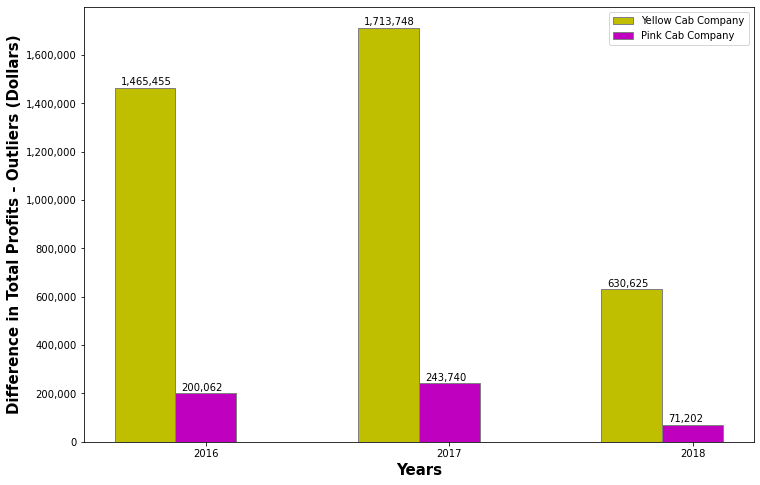

In [16]:
# Charts 1a (Difference in Total Profits per Year per Company when Outs are Out)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
totProfitsPerYearYellow = [totProfitYellow2016 - totProfitOutsOutYellow2016, totProfitYellow2017 - totProfitOutsOutYellow2017, totProfitYellow2018 - totProfitOutsOutYellow2018]
totProfitsPerYearPink = [totProfitPink2016 - totProfitOutsOutPink2016, totProfitPink2017 - totProfitOutsOutPink2017, totProfitPink2018 - totProfitOutsOutPink2018]

# Set position of bar on X axis
br1 = np.arange(len(totProfitsPerYearYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totProfitsPerYearYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, totProfitsPerYearPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics
for i, v in enumerate(totProfitsPerYearYellow):
    plt.text(br1[i] - 0.1, v + 10000, "{:,.0f}".format(v))
for i, v in enumerate(totProfitsPerYearPink):
    plt.text(br2[i] - 0.1, v + 10000, "{:,.0f}".format(v))
    
plt.xlabel('Years', fontweight ='bold', fontsize = 15)
plt.ylabel('Difference in Total Profits - Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totProfitsPerYearYellow))],
['2016', '2017', '2018'])

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


---

## Result 1a: Yellow loses much more from total profit than Pink when outliers are removed but since its total profit is also much more than the Pink, we should examine the total profit chart again without the outliers.

---

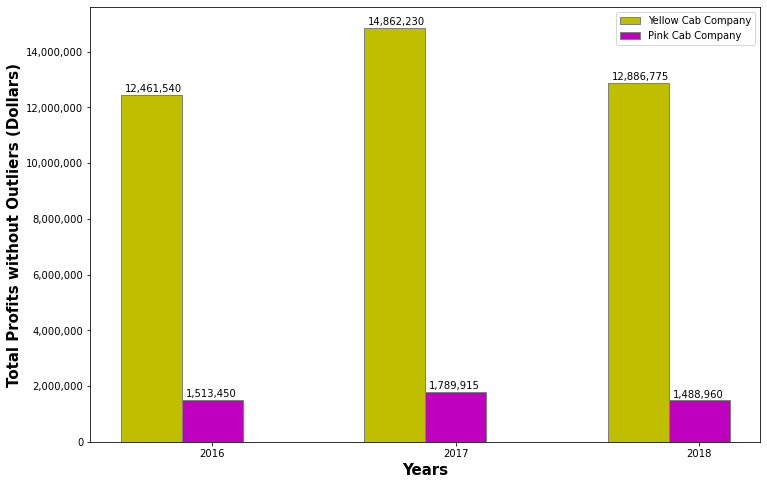

In [17]:
# Charts 1b (Total Profits per Year per Company when Outs are Out)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
totProfitsPerYearYellow = [totProfitOutsOutYellow2016, totProfitOutsOutYellow2017, totProfitOutsOutYellow2018]
totProfitsPerYearPink = [totProfitOutsOutPink2016, totProfitOutsOutPink2017, totProfitOutsOutPink2018]

# Set position of bar on X axis
br1 = np.arange(len(totProfitsPerYearYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totProfitsPerYearYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, totProfitsPerYearPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics
for i, v in enumerate(totProfitsPerYearYellow):
    plt.text(br1[i] - 0.11, v + 100000, "{:,.0f}".format(v))
for i, v in enumerate(totProfitsPerYearPink):
    plt.text(br2[i] - 0.11, v + 100000, "{:,.0f}".format(v))

plt.xlabel('Years', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Profits without Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totProfitsPerYearYellow))],
['2016', '2017', '2018'])

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()

---

## Result 1b: Although, removal of outliers affected Yellow more, Yellow is still much better than Pink in terms of Total Profits in all of the years.

---

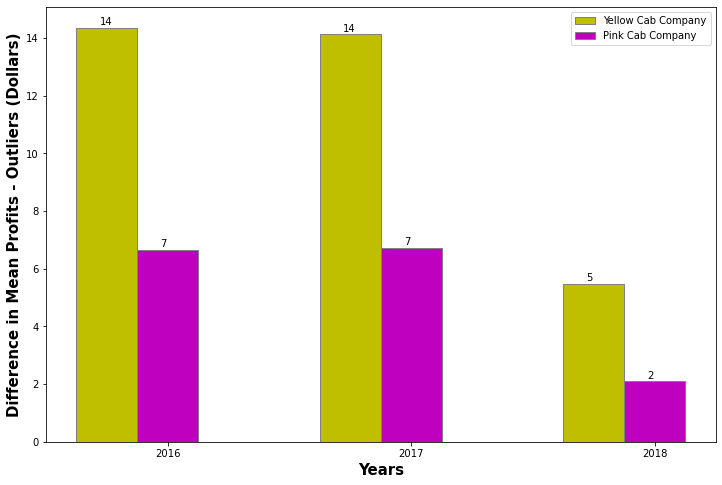

In [18]:
# Charts 2a (Difference in Mean Profits per Year per Company when Outs are Out)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
meanProfitsPerYearYellow = [meanProfitYellow2016 - meanProfitOutsOutYellow2016, meanProfitYellow2017 - meanProfitOutsOutYellow2017, meanProfitYellow2018 - meanProfitOutsOutYellow2018]
meanProfitsPerYearPink = [meanProfitPink2016 - meanProfitOutsOutPink2016, meanProfitPink2017 - meanProfitOutsOutPink2017, meanProfitPink2018 - meanProfitOutsOutPink2018]

# Set position of bar on X axis
br1 = np.arange(len(meanProfitsPerYearYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, meanProfitsPerYearYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, meanProfitsPerYearPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics

for i, v in enumerate(meanProfitsPerYearYellow):
    plt.text(br1[i] - 0.03, v + 0.1, "{:,.0f}".format(v))
for i, v in enumerate(meanProfitsPerYearPink):
    plt.text(br2[i] - 0.03, v + 0.1, "{:,.0f}".format(v))


plt.xlabel('Years', fontweight ='bold', fontsize = 15)
plt.ylabel('Difference in Mean Profits - Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(meanProfitsPerYearYellow))],
['2016', '2017', '2018'])

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


---

## Result 2a: Yellow loses more from mean profit than Pink when outliers are removed but since its mean profit is also more than the Pink, we should examine the mean profit chart again without the outliers.

---

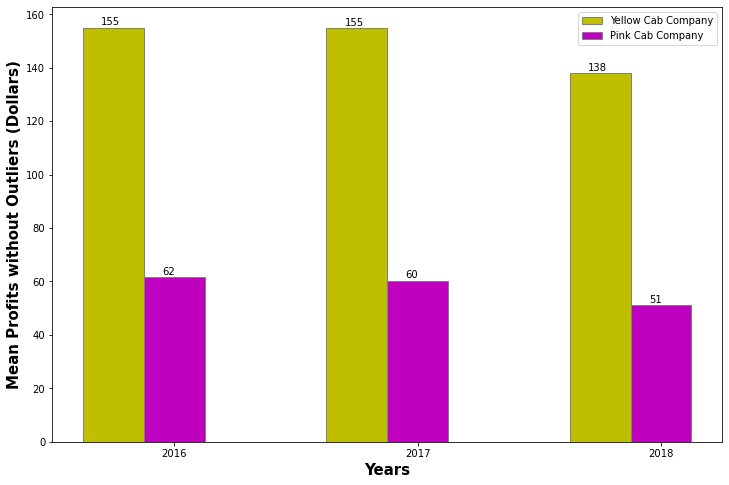

In [19]:
# Charts 2b (Mean Profits per Year per Company when Outs are Out)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
meanProfitsPerYearYellow = [meanProfitOutsOutYellow2016, meanProfitOutsOutYellow2017, meanProfitOutsOutYellow2018]
meanProfitsPerYearPink = [meanProfitOutsOutPink2016, meanProfitOutsOutPink2017, meanProfitOutsOutPink2018]

# Set position of bar on X axis
br1 = np.arange(len(meanProfitsPerYearYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, meanProfitsPerYearYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, meanProfitsPerYearPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics

for i, v in enumerate(meanProfitsPerYearYellow):
    plt.text(br1[i] - 0.05, v + 1, "{:,.0f}".format(v))
for i, v in enumerate(meanProfitsPerYearPink):
    plt.text(br2[i] - 0.05, v + 1, "{:,.0f}".format(v))


plt.xlabel('Years', fontweight ='bold', fontsize = 15)
plt.ylabel('Mean Profits without Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(meanProfitsPerYearYellow))],
['2016', '2017', '2018'])

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


---

## Result 2b: Although, removal of outliers affected Yellow more, Yellow is still much better than Pink in terms of mean profits in all of the years.

---

# _07. Seasonal Changes in Profit_

In [20]:
# Yellow Profits by Season by Year

# Summer

profitsOutsOutYellow2016Summer = dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2016) 
                    & ((dfMainYellowOutsOut["MonthOfTravelNorm"] == 6) 
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 7)
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 8))]["Profit"]

profitsOutsOutYellow2017Summer = dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2017) 
                    & ((dfMainYellowOutsOut["MonthOfTravelNorm"] == 6) 
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 7)
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 8))]["Profit"]

profitsOutsOutYellow2018Summer = dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2018) 
                    & ((dfMainYellowOutsOut["MonthOfTravelNorm"] == 6) 
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 7)
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 8))]["Profit"]


# Autumn

profitsOutsOutYellow2016Autumn = dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2016) 
                    & ((dfMainYellowOutsOut["MonthOfTravelNorm"] == 9) 
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 10)
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 11))]["Profit"]

profitsOutsOutYellow2017Autumn = dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2017) 
                    & ((dfMainYellowOutsOut["MonthOfTravelNorm"] == 9) 
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 10)
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 11))]["Profit"]

profitsOutsOutYellow2018Autumn = dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2018) 
                    & ((dfMainYellowOutsOut["MonthOfTravelNorm"] == 9) 
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 10)
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 11))]["Profit"]


# Winter

profitsOutsOutYellow2016Winter = dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2016) 
                    & ((dfMainYellowOutsOut["MonthOfTravelNorm"] == 12) 
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 1)
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 2))]["Profit"]

profitsOutsOutYellow2017Winter = dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2017) 
                    & ((dfMainYellowOutsOut["MonthOfTravelNorm"] == 12) 
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 1)
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 2))]["Profit"]

profitsOutsOutYellow2018Winter = dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2018) 
                    & ((dfMainYellowOutsOut["MonthOfTravelNorm"] == 12) 
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 1)
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 2))]["Profit"]

# Spring

profitsOutsOutYellow2016Spring = dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2016) 
                    & ((dfMainYellowOutsOut["MonthOfTravelNorm"] == 3) 
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 4)
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 5))]["Profit"]

profitsOutsOutYellow2017Spring = dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2017) 
                    & ((dfMainYellowOutsOut["MonthOfTravelNorm"] == 3) 
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 4)
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 5))]["Profit"]

profitsOutsOutYellow2018Spring = dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2018) 
                    & ((dfMainYellowOutsOut["MonthOfTravelNorm"] == 3) 
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 4)
                   | (dfMainYellowOutsOut["MonthOfTravelNorm"] == 5))]["Profit"]

In [21]:
# Pink Profits by Season by Year

# Summer

profitsOutsOutPink2016Summer = dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2016) 
                    & ((dfMainPinkOutsOut["MonthOfTravelNorm"] == 6) 
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 7)
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 8))]["Profit"]

profitsOutsOutPink2017Summer = dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2017) 
                    & ((dfMainPinkOutsOut["MonthOfTravelNorm"] == 6) 
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 7)
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 8))]["Profit"]

profitsOutsOutPink2018Summer = dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2018) 
                    & ((dfMainPinkOutsOut["MonthOfTravelNorm"] == 6) 
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 7)
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 8))]["Profit"]


# Autumn

profitsOutsOutPink2016Autumn = dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2016) 
                    & ((dfMainPinkOutsOut["MonthOfTravelNorm"] == 9) 
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 10)
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 11))]["Profit"]

profitsOutsOutPink2017Autumn = dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2017) 
                    & ((dfMainPinkOutsOut["MonthOfTravelNorm"] == 9) 
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 10)
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 11))]["Profit"]

profitsOutsOutPink2018Autumn = dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2018) 
                    & ((dfMainPinkOutsOut["MonthOfTravelNorm"] == 9) 
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 10)
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 11))]["Profit"]


# Winter

profitsOutsOutPink2016Winter = dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2016) 
                    & ((dfMainPinkOutsOut["MonthOfTravelNorm"] == 12) 
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 1)
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 2))]["Profit"]

profitsOutsOutPink2017Winter = dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2017) 
                    & ((dfMainPinkOutsOut["MonthOfTravelNorm"] == 12) 
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 1)
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 2))]["Profit"]

profitsOutsOutPink2018Winter = dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2018) 
                    & ((dfMainPinkOutsOut["MonthOfTravelNorm"] == 12) 
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 1)
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 2))]["Profit"]

# Spring

profitsOutsOutPink2016Spring = dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2016) 
                    & ((dfMainPinkOutsOut["MonthOfTravelNorm"] == 3) 
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 4)
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 5))]["Profit"]

profitsOutsOutPink2017Spring = dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2017) 
                    & ((dfMainPinkOutsOut["MonthOfTravelNorm"] == 3) 
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 4)
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 5))]["Profit"]

profitsOutsOutPink2018Spring = dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2018) 
                    & ((dfMainPinkOutsOut["MonthOfTravelNorm"] == 3) 
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 4)
                   | (dfMainPinkOutsOut["MonthOfTravelNorm"] == 5))]["Profit"]

In [22]:
# Yellow's Sum of Total profits per year per season

sumOfProfitsOutsOutYellow2016Spring = np.sum(np.asanyarray(profitsOutsOutYellow2016Spring))
sumOfProfitsOutsOutYellow2016Summer = np.sum(np.asanyarray(profitsOutsOutYellow2016Summer))
sumOfProfitsOutsOutYellow2016Autumn = np.sum(np.asanyarray(profitsOutsOutYellow2016Autumn))
sumOfProfitsOutsOutYellow2016Winter = np.sum(np.asanyarray(profitsOutsOutYellow2016Winter))

sumOfProfitsOutsOutYellow2017Spring = np.sum(np.asanyarray(profitsOutsOutYellow2017Spring))
sumOfProfitsOutsOutYellow2017Summer = np.sum(np.asanyarray(profitsOutsOutYellow2017Summer))
sumOfProfitsOutsOutYellow2017Autumn = np.sum(np.asanyarray(profitsOutsOutYellow2017Autumn))
sumOfProfitsOutsOutYellow2017Winter = np.sum(np.asanyarray(profitsOutsOutYellow2017Winter))

sumOfProfitsOutsOutYellow2018Spring = np.sum(np.asanyarray(profitsOutsOutYellow2018Spring))
sumOfProfitsOutsOutYellow2018Summer = np.sum(np.asanyarray(profitsOutsOutYellow2018Summer))
sumOfProfitsOutsOutYellow2018Autumn = np.sum(np.asanyarray(profitsOutsOutYellow2018Autumn))
sumOfProfitsOutsOutYellow2018Winter = np.sum(np.asanyarray(profitsOutsOutYellow2018Winter))

In [23]:
# Pink's Sum of Total profits per year per season

sumOfProfitsOutsOutPink2016Spring = np.sum(np.asanyarray(profitsOutsOutPink2016Spring))
sumOfProfitsOutsOutPink2016Summer = np.sum(np.asanyarray(profitsOutsOutPink2016Summer))
sumOfProfitsOutsOutPink2016Autumn = np.sum(np.asanyarray(profitsOutsOutPink2016Autumn))
sumOfProfitsOutsOutPink2016Winter = np.sum(np.asanyarray(profitsOutsOutPink2016Winter))

sumOfProfitsOutsOutPink2017Spring = np.sum(np.asanyarray(profitsOutsOutPink2017Spring))
sumOfProfitsOutsOutPink2017Summer = np.sum(np.asanyarray(profitsOutsOutPink2017Summer))
sumOfProfitsOutsOutPink2017Autumn = np.sum(np.asanyarray(profitsOutsOutPink2017Autumn))
sumOfProfitsOutsOutPink2017Winter = np.sum(np.asanyarray(profitsOutsOutPink2017Winter))

sumOfProfitsOutsOutPink2018Spring = np.sum(np.asanyarray(profitsOutsOutPink2018Spring))
sumOfProfitsOutsOutPink2018Summer = np.sum(np.asanyarray(profitsOutsOutPink2018Summer))
sumOfProfitsOutsOutPink2018Autumn = np.sum(np.asanyarray(profitsOutsOutPink2018Autumn))
sumOfProfitsOutsOutPink2018Winter = np.sum(np.asanyarray(profitsOutsOutPink2018Winter))

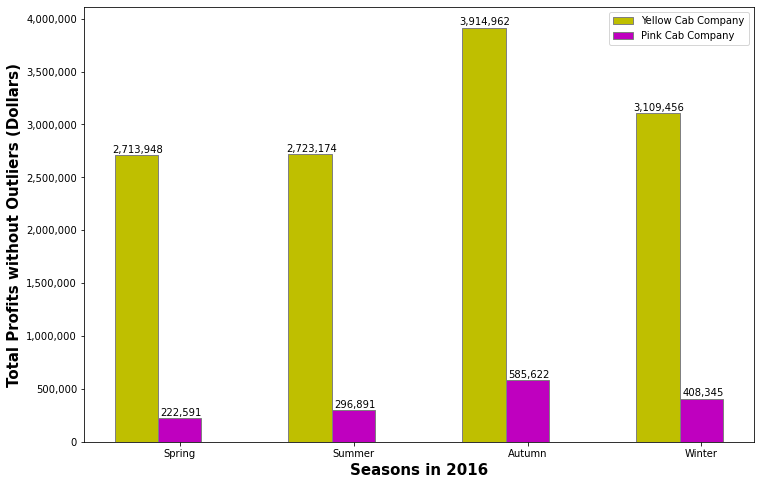

In [24]:
# Charts 1a (Total Profits per Year per Company when Outs are Out)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
totProfitsPerSeasonYellow = [sumOfProfitsOutsOutYellow2016Spring, sumOfProfitsOutsOutYellow2016Summer, 
                         sumOfProfitsOutsOutYellow2016Autumn, sumOfProfitsOutsOutYellow2016Winter]
totProfitsPerSeasonPink = [sumOfProfitsOutsOutPink2016Spring, sumOfProfitsOutsOutPink2016Summer, 
                         sumOfProfitsOutsOutPink2016Autumn, sumOfProfitsOutsOutPink2016Winter]

# Set position of bar on X axis
br1 = np.arange(len(totProfitsPerSeasonYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totProfitsPerSeasonYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, totProfitsPerSeasonPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics
for i, v in enumerate(totProfitsPerSeasonYellow):
    plt.text(br1[i] - 0.14, v + 22900, "{:,.0f}".format(v))
for i, v in enumerate(totProfitsPerSeasonPink):
    plt.text(br2[i] - 0.11, v + 22900, "{:,.0f}".format(v))

plt.xlabel('Seasons in 2016', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Profits without Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totProfitsPerSeasonYellow))],
['Spring', 'Summer', 'Autumn', 'Winter'])

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


---

## Result 1a: Yellow is much better than Pink in all seasons of the year 2016.

---

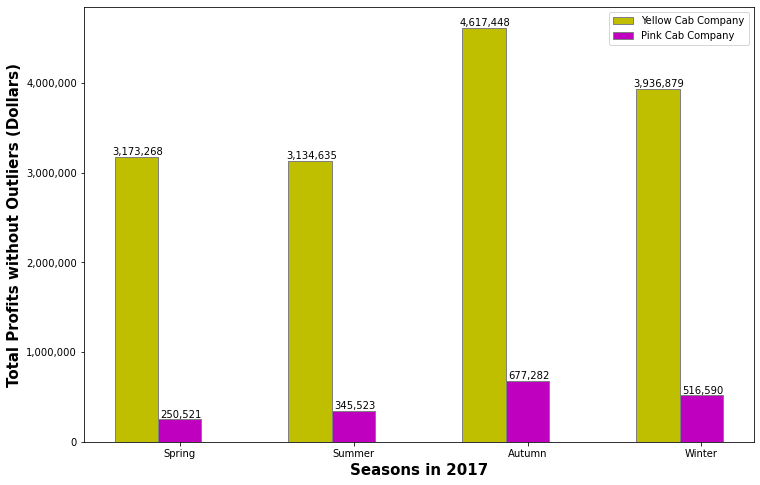

In [25]:
# Charts 1b (Total Profits per Year per Company when Outs are Out)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
totProfitsPerSeasonYellow = [sumOfProfitsOutsOutYellow2017Spring, sumOfProfitsOutsOutYellow2017Summer, 
                         sumOfProfitsOutsOutYellow2017Autumn, sumOfProfitsOutsOutYellow2017Winter]
totProfitsPerSeasonPink = [sumOfProfitsOutsOutPink2017Spring, sumOfProfitsOutsOutPink2017Summer, 
                         sumOfProfitsOutsOutPink2017Autumn, sumOfProfitsOutsOutPink2017Winter]

# Set position of bar on X axis
br1 = np.arange(len(totProfitsPerSeasonYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totProfitsPerSeasonYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, totProfitsPerSeasonPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics
for i, v in enumerate(totProfitsPerSeasonYellow):
    plt.text(br1[i] - 0.14, v + 22900, "{:,.0f}".format(v))
for i, v in enumerate(totProfitsPerSeasonPink):
    plt.text(br2[i] - 0.11, v + 22900, "{:,.0f}".format(v))

plt.xlabel('Seasons in 2017', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Profits without Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totProfitsPerSeasonYellow))],
['Spring', 'Summer', 'Autumn', 'Winter'])

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


---

## Result 1b: Yellow is much better than Pink in all seasons of the year 2017.

---

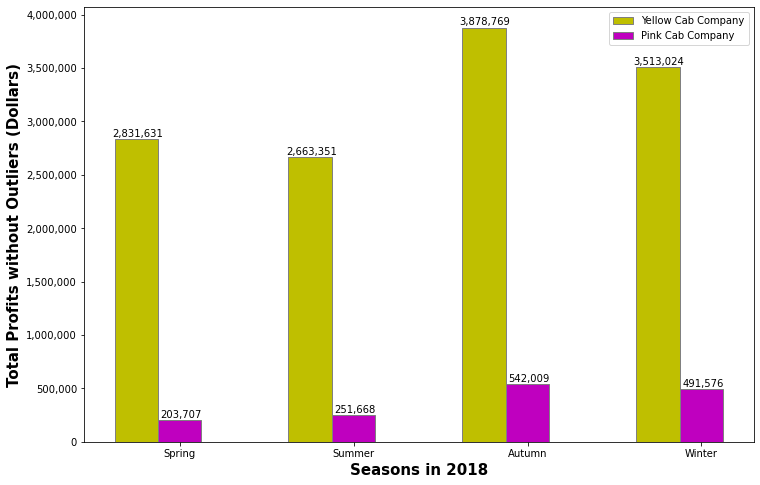

In [26]:
# Charts 1c (Total Profits per Year per Company when Outs are Out)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
totProfitsPerSeasonYellow = [sumOfProfitsOutsOutYellow2018Spring, sumOfProfitsOutsOutYellow2018Summer, 
                         sumOfProfitsOutsOutYellow2018Autumn, sumOfProfitsOutsOutYellow2018Winter]
totProfitsPerSeasonPink = [sumOfProfitsOutsOutPink2018Spring, sumOfProfitsOutsOutPink2018Summer, 
                         sumOfProfitsOutsOutPink2018Autumn, sumOfProfitsOutsOutPink2018Winter]

# Set position of bar on X axis
br1 = np.arange(len(totProfitsPerSeasonYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totProfitsPerSeasonYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, totProfitsPerSeasonPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics
for i, v in enumerate(totProfitsPerSeasonYellow):
    plt.text(br1[i] - 0.14, v + 22900, "{:,.0f}".format(v))
for i, v in enumerate(totProfitsPerSeasonPink):
    plt.text(br2[i] - 0.11, v + 22900, "{:,.0f}".format(v))

plt.xlabel('Seasons in 2018', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Profits without Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totProfitsPerSeasonYellow))],
['Spring', 'Summer', 'Autumn', 'Winter'])

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


---

## Result 1c: Yellow is much better than Pink in all seasons of the year 2018.

---

# _08. Age Groups in Profit_

In [65]:
# total profits without outliers per year

profitsOutsOutYellow20161840 = dfMainYellowOutsOut[dfMainYellowOutsOut["YearOfTravelNorm"] == 2016 & 
                                               (dfMainYellowOutsOut["Age"] > 17) & (dfMainYellowOutsOut["Age"] < 41)]["Profit"]
profitsOutsOutYellow2017= dfMainYellowOutsOut[dfMainYellowOutsOut["YearOfTravelNorm"] == 2017]["Profit"]
profitsOutsOutYellow2018 = dfMainYellowOutsOut[dfMainYellowOutsOut["YearOfTravelNorm"] == 2018]["Profit"]

profitsOutsOutPink2016 = dfMainPinkOutsOut[dfMainPinkOutsOut["YearOfTravelNorm"] == 2016]["Profit"]
profitsOutsOutPink2017 = dfMainPinkOutsOut[dfMainPinkOutsOut["YearOfTravelNorm"] == 2017]["Profit"]
profitsOutsOutPink2018 = dfMainPinkOutsOut[dfMainPinkOutsOut["YearOfTravelNorm"] == 2018]["Profit"]

In [66]:
# Yellow Total Profit By Age Group by Year

profitsOutsOutYellow2016Age1840 = np.sum(np.asanyarray(dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2016) & 
                                               (dfMainYellowOutsOut["Age"] > 17) & (dfMainYellowOutsOut["Age"] < 41)]["Profit"]))
profitsOutsOutYellow2016Age4165 = np.sum(np.asanyarray(dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2016) & 
                                               (dfMainYellowOutsOut["Age"] > 40)]["Profit"]))

profitsOutsOutYellow2017Age1840 = np.sum(np.asanyarray(dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2017) & 
                                               (dfMainYellowOutsOut["Age"] > 17) & (dfMainYellowOutsOut["Age"] < 41)]["Profit"]))
profitsOutsOutYellow2017Age4165 = np.sum(np.asanyarray(dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2017) & 
                                               (dfMainYellowOutsOut["Age"] > 40)]["Profit"]))

profitsOutsOutYellow2018Age1840 = np.sum(np.asanyarray(dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2018) & 
                                               (dfMainYellowOutsOut["Age"] > 17) & (dfMainYellowOutsOut["Age"] < 41)]["Profit"]))
profitsOutsOutYellow2018Age4165 = np.sum(np.asanyarray(dfMainYellowOutsOut[(dfMainYellowOutsOut["YearOfTravelNorm"] == 2018) & 
                                               (dfMainYellowOutsOut["Age"] > 40)]["Profit"]))

In [67]:
# Pink Total Profit By Age Group by Year

profitsOutsOutPink2016Age1840 = np.sum(np.asanyarray(dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2016) & 
                                               (dfMainPinkOutsOut["Age"] > 17) & (dfMainPinkOutsOut["Age"] < 41)]["Profit"]))
profitsOutsOutPink2016Age4165 = np.sum(np.asanyarray(dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2016) & 
                                               (dfMainPinkOutsOut["Age"] > 40)]["Profit"]))

profitsOutsOutPink2017Age1840 = np.sum(np.asanyarray(dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2017) & 
                                               (dfMainPinkOutsOut["Age"] > 17) & (dfMainPinkOutsOut["Age"] < 41)]["Profit"]))
profitsOutsOutPink2017Age4165 = np.sum(np.asanyarray(dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2017) & 
                                               (dfMainPinkOutsOut["Age"] > 40)]["Profit"]))

profitsOutsOutPink2018Age1840 = np.sum(np.asanyarray(dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2018) & 
                                               (dfMainPinkOutsOut["Age"] > 17) & (dfMainPinkOutsOut["Age"] < 41)]["Profit"]))
profitsOutsOutPink2018Age4165 = np.sum(np.asanyarray(dfMainPinkOutsOut[(dfMainPinkOutsOut["YearOfTravelNorm"] == 2018) & 
                                               (dfMainPinkOutsOut["Age"] > 40)]["Profit"]))

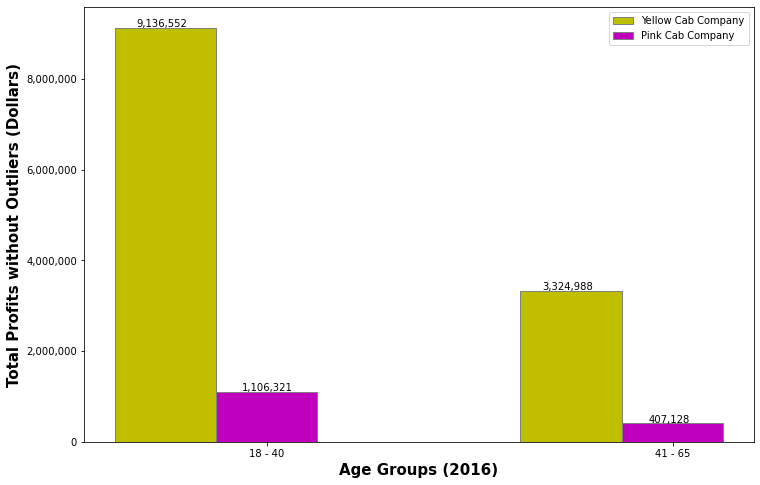

In [164]:
# Charts 1a (Total Profits per Age Group per Year per Company)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
totProfitsPerSeasonYellow = [profitsOutsOutYellow2016Age1840, profitsOutsOutYellow2016Age4165]
totProfitsPerSeasonPink = [profitsOutsOutPink2016Age1840, profitsOutsOutPink2016Age4165]

# Set position of bar on X axis
br1 = np.arange(len(totProfitsPerSeasonYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totProfitsPerSeasonYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, totProfitsPerSeasonPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics
for i, v in enumerate(totProfitsPerSeasonYellow):
    plt.text(br1[i] - 0.07, v + 22900, "{:,.0f}".format(v))
for i, v in enumerate(totProfitsPerSeasonPink):
    plt.text(br2[i] - 0.06, v + 22900, "{:,.0f}".format(v))

plt.xlabel('Age Groups (2016)', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Profits without Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totProfitsPerSeasonYellow))],
['18 - 40', '41 - 65'])

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


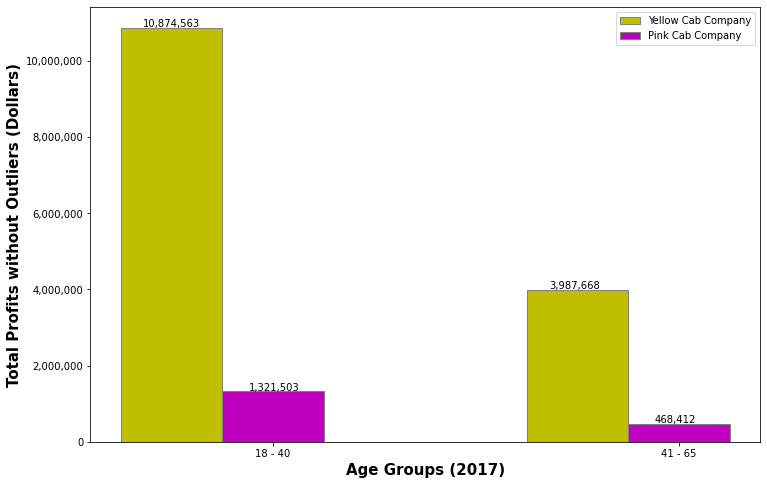

In [163]:
# Charts 1b (Total Profits per Age Group per Year per Company)
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
totProfitsPerSeasonYellow = [profitsOutsOutYellow2017Age1840, profitsOutsOutYellow2017Age4165]
totProfitsPerSeasonPink = [profitsOutsOutPink2017Age1840, profitsOutsOutPink2017Age4165]

# Set position of bar on X axis
br1 = np.arange(len(totProfitsPerSeasonYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totProfitsPerSeasonYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, totProfitsPerSeasonPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics
for i, v in enumerate(totProfitsPerSeasonYellow):
    plt.text(br1[i] - 0.07, v + 22900, "{:,.0f}".format(v))
for i, v in enumerate(totProfitsPerSeasonPink):
    plt.text(br2[i] - 0.06, v + 22900, "{:,.0f}".format(v))

plt.xlabel('Age Groups (2017)', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Profits without Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totProfitsPerSeasonYellow))],
['18 - 40', '41 - 65'])

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


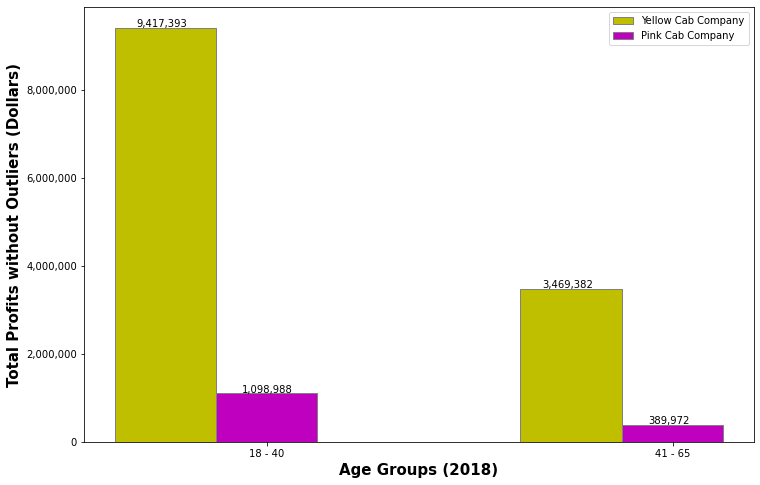

In [162]:
# Charts 1c (Total Profits per Age Group per Year per Company)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
totProfitsPerSeasonYellow = [profitsOutsOutYellow2018Age1840, profitsOutsOutYellow2018Age4165]
totProfitsPerSeasonPink = [profitsOutsOutPink2018Age1840, profitsOutsOutPink2018Age4165]

# Set position of bar on X axis
br1 = np.arange(len(totProfitsPerSeasonYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totProfitsPerSeasonYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, totProfitsPerSeasonPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics
for i, v in enumerate(totProfitsPerSeasonYellow):
    plt.text(br1[i] - 0.07, v + 22900, "{:,.0f}".format(v))
for i, v in enumerate(totProfitsPerSeasonPink):
    plt.text(br2[i] - 0.06, v + 22900, "{:,.0f}".format(v))

plt.xlabel('Age Groups (2018)', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Profits without Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totProfitsPerSeasonYellow))],
['18 - 40', '41 - 65'])

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


---

## Result 1a: In all of the years, Yellow Cab Company has much more profit than Pink Cab Company for all age groups (18-40, 41-65). The difference is more for 18-40 age group.

---

# _09. City Factor in Profit_

In [100]:
# Yellow

dfGroupYellowCityProfit2016 = dfMainYellowOutsOut[dfMainYellowOutsOut["YearOfTravelNorm"] == 2016][['City','Profit']]

dfGroupYellowCityProfit2017 = dfMainYellowOutsOut[dfMainYellowOutsOut["YearOfTravelNorm"] == 2017][['City','Profit']]

dfGroupYellowCityProfit2018 = dfMainYellowOutsOut[dfMainYellowOutsOut["YearOfTravelNorm"] == 2018][['City','Profit']]

In [107]:
# Yellow

dfGroupYellowCityProfitGroups2016 = dfGroupYellowCityProfit2016.groupby(['City'],as_index=False).sum()

dfGroupYellowCityProfitGroups2017 = dfGroupYellowCityProfit2017.groupby(['City'],as_index=False).sum()

dfGroupYellowCityProfitGroups2018 = dfGroupYellowCityProfit2018.groupby(['City'],as_index=False).sum()

In [126]:
# Pink

dfGroupPinkCityProfit2016 = dfMainPinkOutsOut[dfMainPinkOutsOut["YearOfTravelNorm"] == 2016][['City','Profit']]

dfGroupPinkCityProfit2017 = dfMainPinkOutsOut[dfMainPinkOutsOut["YearOfTravelNorm"] == 2017][['City','Profit']]

dfGroupPinkCityProfit2018 = dfMainPinkOutsOut[dfMainPinkOutsOut["YearOfTravelNorm"] == 2018][['City','Profit']]

In [127]:
# Pink

dfGroupPinkCityProfitGroups2016 = dfGroupPinkCityProfit2016.groupby(['City'],as_index=False).sum()

dfGroupPinkCityProfitGroups2017 = dfGroupPinkCityProfit2017.groupby(['City'],as_index=False).sum()

dfGroupPinkCityProfitGroups2018 = dfGroupPinkCityProfit2018.groupby(['City'],as_index=False).sum()

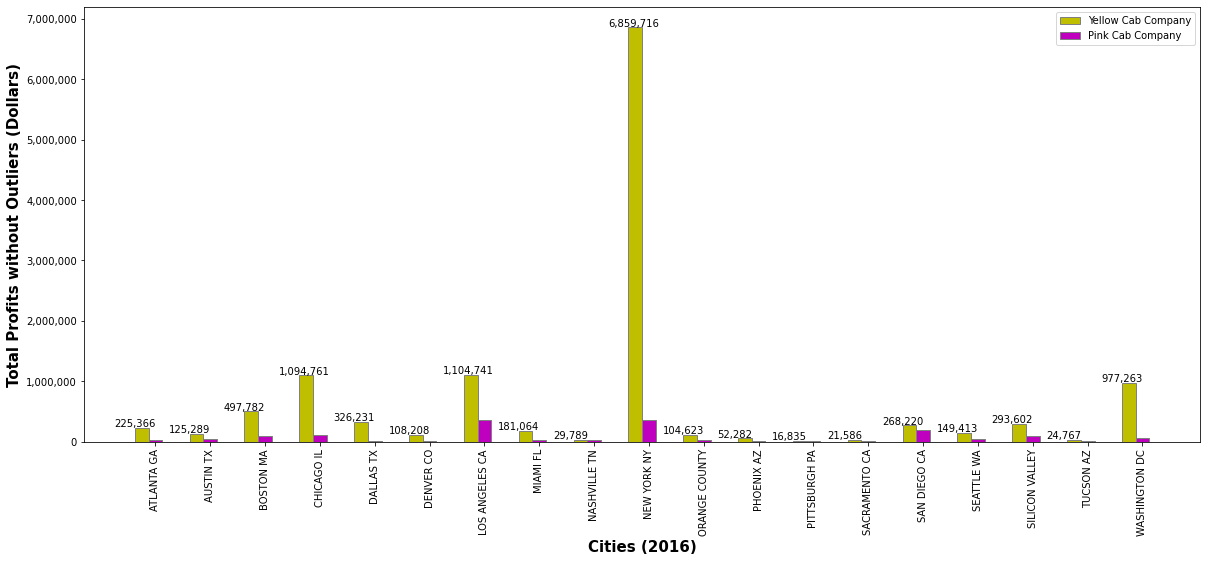

In [165]:
# Charts 1a (Total Profits per Age Group per Year per Company)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))

# set height of bar
totProfitsPerSeasonYellow = np.asanyarray(dfGroupYellowCityProfitGroups2016["Profit"])
totProfitsPerSeasonPink = np.asanyarray(dfGroupPinkCityProfitGroups2016["Profit"])

# Set position of bar on X axis
br1 = np.arange(len(totProfitsPerSeasonYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totProfitsPerSeasonYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, totProfitsPerSeasonPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics

# Adding labels and xtics
for i, v in enumerate(totProfitsPerSeasonYellow):
    plt.text(br1[i] - 0.5, v + 22900, "{:,.0f}".format(v))

plt.xlabel('Cities (2016)', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Profits without Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totProfitsPerSeasonYellow))],
dfGroupPinkCityProfitGroups2016["City"], fontsize = 10, rotation='vertical')

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


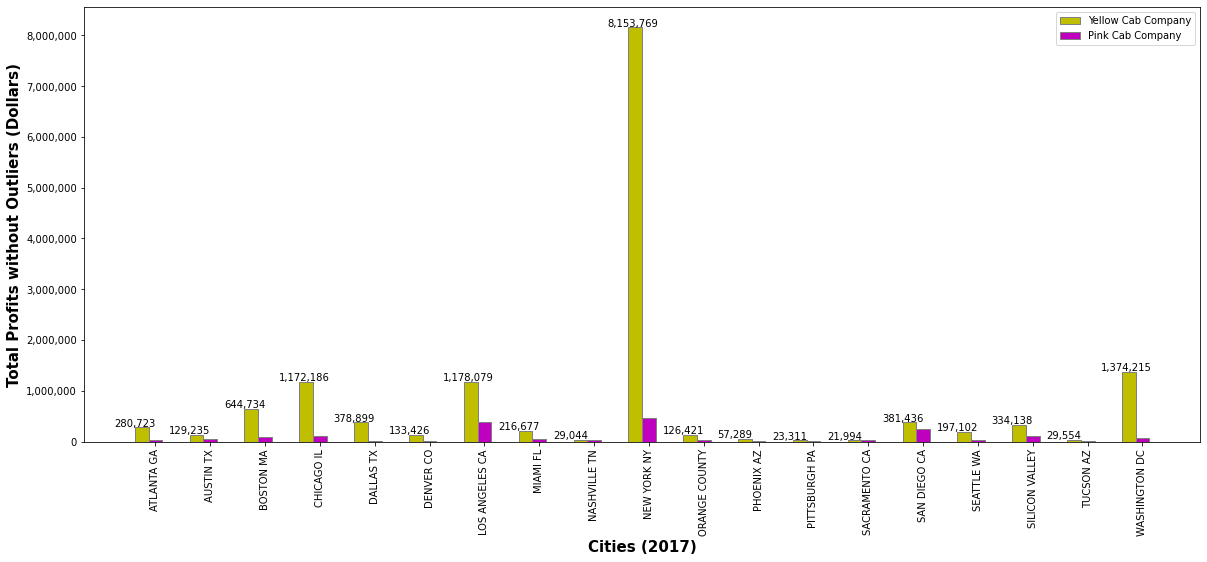

In [166]:
# Charts 1b (Total Profits per Age Group per Year per Company)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))

# set height of bar
totProfitsPerSeasonYellow = np.asanyarray(dfGroupYellowCityProfitGroups2017["Profit"])
totProfitsPerSeasonPink = np.asanyarray(dfGroupPinkCityProfitGroups2017["Profit"])

# Set position of bar on X axis
br1 = np.arange(len(totProfitsPerSeasonYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totProfitsPerSeasonYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, totProfitsPerSeasonPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics

# Adding labels and xtics
for i, v in enumerate(totProfitsPerSeasonYellow):
    plt.text(br1[i] - 0.5, v + 22900, "{:,.0f}".format(v))


plt.xlabel('Cities (2017)', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Profits without Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totProfitsPerSeasonYellow))],
dfGroupPinkCityProfitGroups2017["City"], fontsize = 10, rotation='vertical')

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


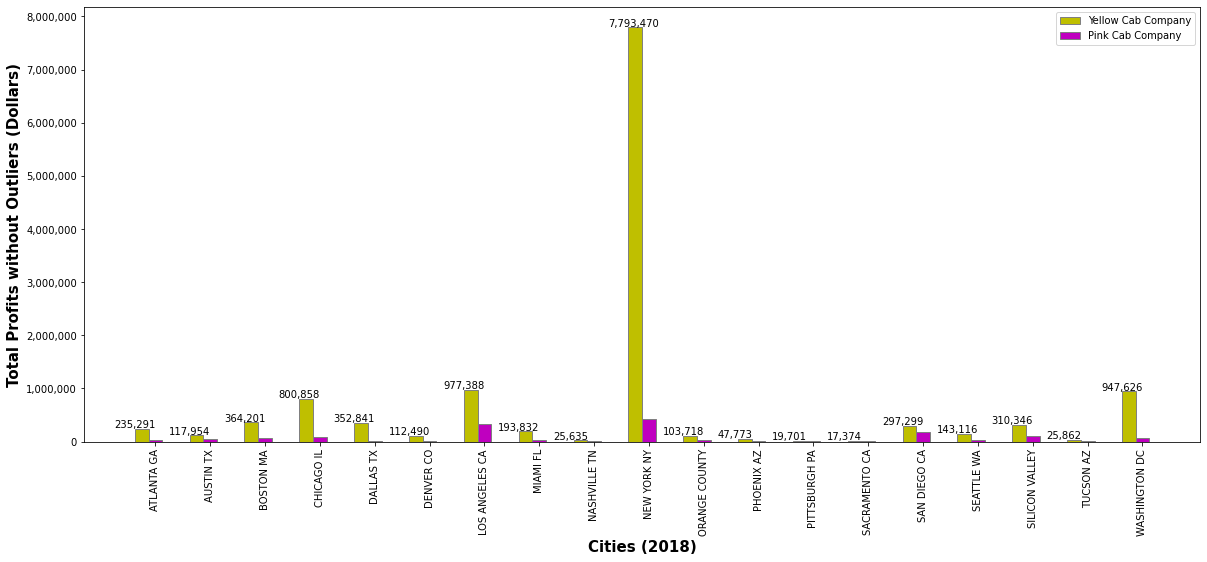

In [167]:
# Charts 1c (Total Profits per Age Group per Year per Company)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))

# set height of bar
totProfitsPerSeasonYellow = np.asanyarray(dfGroupYellowCityProfitGroups2018["Profit"])
totProfitsPerSeasonPink = np.asanyarray(dfGroupPinkCityProfitGroups2018["Profit"])

# Set position of bar on X axis
br1 = np.arange(len(totProfitsPerSeasonYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totProfitsPerSeasonYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, totProfitsPerSeasonPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics

# Adding labels and xtics
for i, v in enumerate(totProfitsPerSeasonYellow):
    plt.text(br1[i] - 0.5, v + 22900, "{:,.0f}".format(v))


plt.xlabel('Cities (2018)', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Profits without Outliers (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totProfitsPerSeasonYellow))],
dfGroupPinkCityProfitGroups2018["City"], fontsize = 10, rotation='vertical')

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


---

## Result 1a: In all of the years, Yellow Cab Company has much more profit than Pink Cab. Especially in New York, the difference is very obvious.

---

---
---
---

# Evaluation of the Results: Suggestion is Yellow Cab.
---
---
---